# Feature Engineering

In [1]:
import warnings
import numpy as np
import lightgbm as lgbm
from process_functions import train_test_loader

warnings.filterwarnings('ignore')

In [2]:
train_features, train_target, test_features, test_target = train_test_loader('../Data/Feature_Engineering')

print("Training Size = {}".format(train_features.shape))
print("Testing Size = {}".format(test_features.shape))

print("No. of positive in training = {}".format(train_target.sum()[0]))
print("No. of positive in testing = {}".format(test_target.sum()[0]))

Training Size = (140000, 200)
Testing Size = (60000, 200)
No. of positive in training = 13964
No. of positive in testing = 6134


### Preparing LightGBM data

In [3]:
train_lgbm = lgbm.Dataset(data=train_features, label=train_target)
test_lgbm = train_lgbm.create_valid(data=test_features, label=test_target)

### Training Model

In [4]:
lgbm_parameter = {
    'num_leaves' : 3,
    'min_data_in_leaf' : 20,
    'max_depth' : 16,
    'bagging_fraction' : 0.4,
    'bagging_freq' : 5,
    'feature_fraction' : 0.1,
    'learning_rate' : 0.01,
    'boosting' : 'gbdt',
    'random_state' : 0,
    'num_boost_round' : 100000,
    'objective' : 'binary',
    'num_threads' : 3,
    'boosting_from_average' : True,
    'metric' : 'auc',
}

bst = lgbm.train(lgbm_parameter, train_set=train_lgbm, valid_sets=[train_lgbm, test_lgbm], \
                 verbose_eval=10000, early_stopping_rounds=10000)

# cv_model = lgbm.cv(lgbm_parameter, train_set=cv_data, num_boost_round=100, nfold=10)

Training until validation scores don't improve for 10000 rounds.
[10000]	training's auc: 0.909846	valid_1's auc: 0.895208
[20000]	training's auc: 0.921065	valid_1's auc: 0.899274
[30000]	training's auc: 0.929143	valid_1's auc: 0.899215
Early stopping, best iteration is:
[24685]	training's auc: 0.925026	valid_1's auc: 0.899444


##### Feature Importance

<BarContainer object of 200 artists>

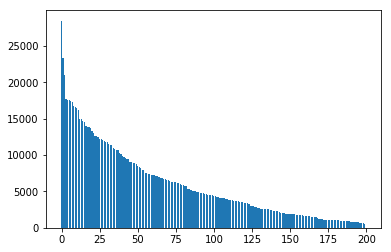

In [6]:
import matplotlib.pyplot as plt

feature_imp = bst.feature_importance(importance_type='gain')

plt.figure()
plt.bar(np.arange(200), np.sort(feature_imp)[::-1])

In [7]:
for i in np.sort(feature_imp)[::-1][0:5]:
    print(i)
    print(np.where(feature_imp==i))

28445.825844287872
(array([81], dtype=int64),)
23279.03518295288
(array([139], dtype=int64),)
20987.721613883972
(array([12], dtype=int64),)
17709.876389980316
(array([110], dtype=int64),)
17617.167719841003
(array([6], dtype=int64),)


## Adding more features

In [31]:
train_ft, train_tar, test_ft, test_tar = train_test_loader('../Data/Feature_Engineering')

print("Training Features = {}".format(train_ft.shape))
print("Testing Features = {}".format(test_ft.shape))

Training Features = (140000, 200)
Testing Features = (60000, 200)


#### Adding more features in training data

In [32]:
# train_ft['var_200'] = train_ft.var_81 * train_ft.var_139
# train_ft['var_201'] = train_ft.var_81 * train_ft.var_12
# train_ft['var_202'] = train_ft.var_81 * train_ft.var_110
# train_ft['var_203'] = train_ft.var_81 * train_ft.var_6

#### Adding more features in testing data

In [33]:
# test_ft['var_200'] = test_ft.var_81 * test_ft.var_139
# test_ft['var_201'] = test_ft.var_81 * test_ft.var_12
# test_ft['var_202'] = test_ft.var_81 * test_ft.var_110
# test_ft['var_203'] = test_ft.var_81 * test_ft.var_6

#### Deleting features from train and test data

In [37]:
np.where(feature_imp==np.sort(feature_imp)[0])

(array([17], dtype=int64),)

In [39]:
train_ft = train_ft.drop(columns=['var_17'])
test_ft = test_ft.drop(columns=['var_17'])

In [40]:
print("Training Features = {}".format(train_ft.shape))
print("Testing Features = {}".format(test_ft.shape))
print("--------------------------------------------")
print("Training Target = {}".format(train_tar.shape))
print("Testing Target = {}".format(test_tar.shape))

Training Features = (140000, 199)
Testing Features = (60000, 199)
--------------------------------------------
Training Target = (140000, 1)
Testing Target = (60000, 1)


### Preparing LightGBM data

In [41]:
feature_train = lgbm.Dataset(data=train_ft, label=train_tar)
feature_test = train_lgbm.create_valid(data=test_ft, label=test_tar)

### Training Model

In [42]:
lgbm_parameter = {
    'num_leaves' : 3,
    'min_data_in_leaf' : 20,
    'max_depth' : 16,
    'bagging_fraction' : 0.4,
    'bagging_freq' : 5,
    'feature_fraction' : 0.1,
    'learning_rate' : 0.01,
    'boosting' : 'gbdt',
    'random_state' : 0,
    'num_boost_round' : 100000,
    'objective' : 'binary',
    'num_threads' : 3,
    'boost_from_average' : True,
    'metric' : 'auc',
}

ft_bst = lgbm.train(lgbm_parameter, train_set=feature_train, valid_sets=[feature_train, feature_test], \
                    verbose_eval=10000, early_stopping_rounds=10000)

Training until validation scores don't improve for 10000 rounds.
[10000]	training's auc: 0.909861	valid_1's auc: 0.894858
[20000]	training's auc: 0.920964	valid_1's auc: 0.899029
[30000]	training's auc: 0.928978	valid_1's auc: 0.899151
Early stopping, best iteration is:
[28881]	training's auc: 0.928127	valid_1's auc: 0.899219


In [14]:
train_features.shape

(140000, 200)